### Work Flow
Data collection ---> Data Preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [35]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Data Collection

In [36]:
# load the data
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

In [37]:
# get some information on the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# check for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Analysis

In [39]:
# get some statistical information
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
# check the outcomes
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
# calculate teh correlation matrix
correlation_matrix = diabetes.corr()

# set the threshold for correlation
correlation_threshold = 0.5

In [42]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
Pregnancies - Age: 0.54
Age - Pregnancies: 0.54


In [43]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['Outcome']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Outcome: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Outcome: 
Outcome: 1.00


In [44]:
sns.set()

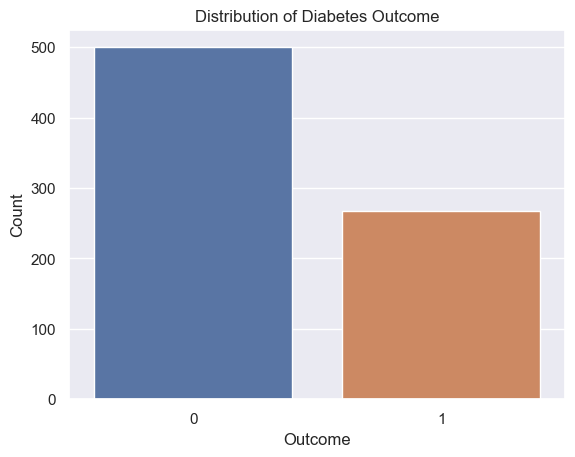

In [45]:
# distribution of the target variable
sns.countplot(diabetes['Outcome'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

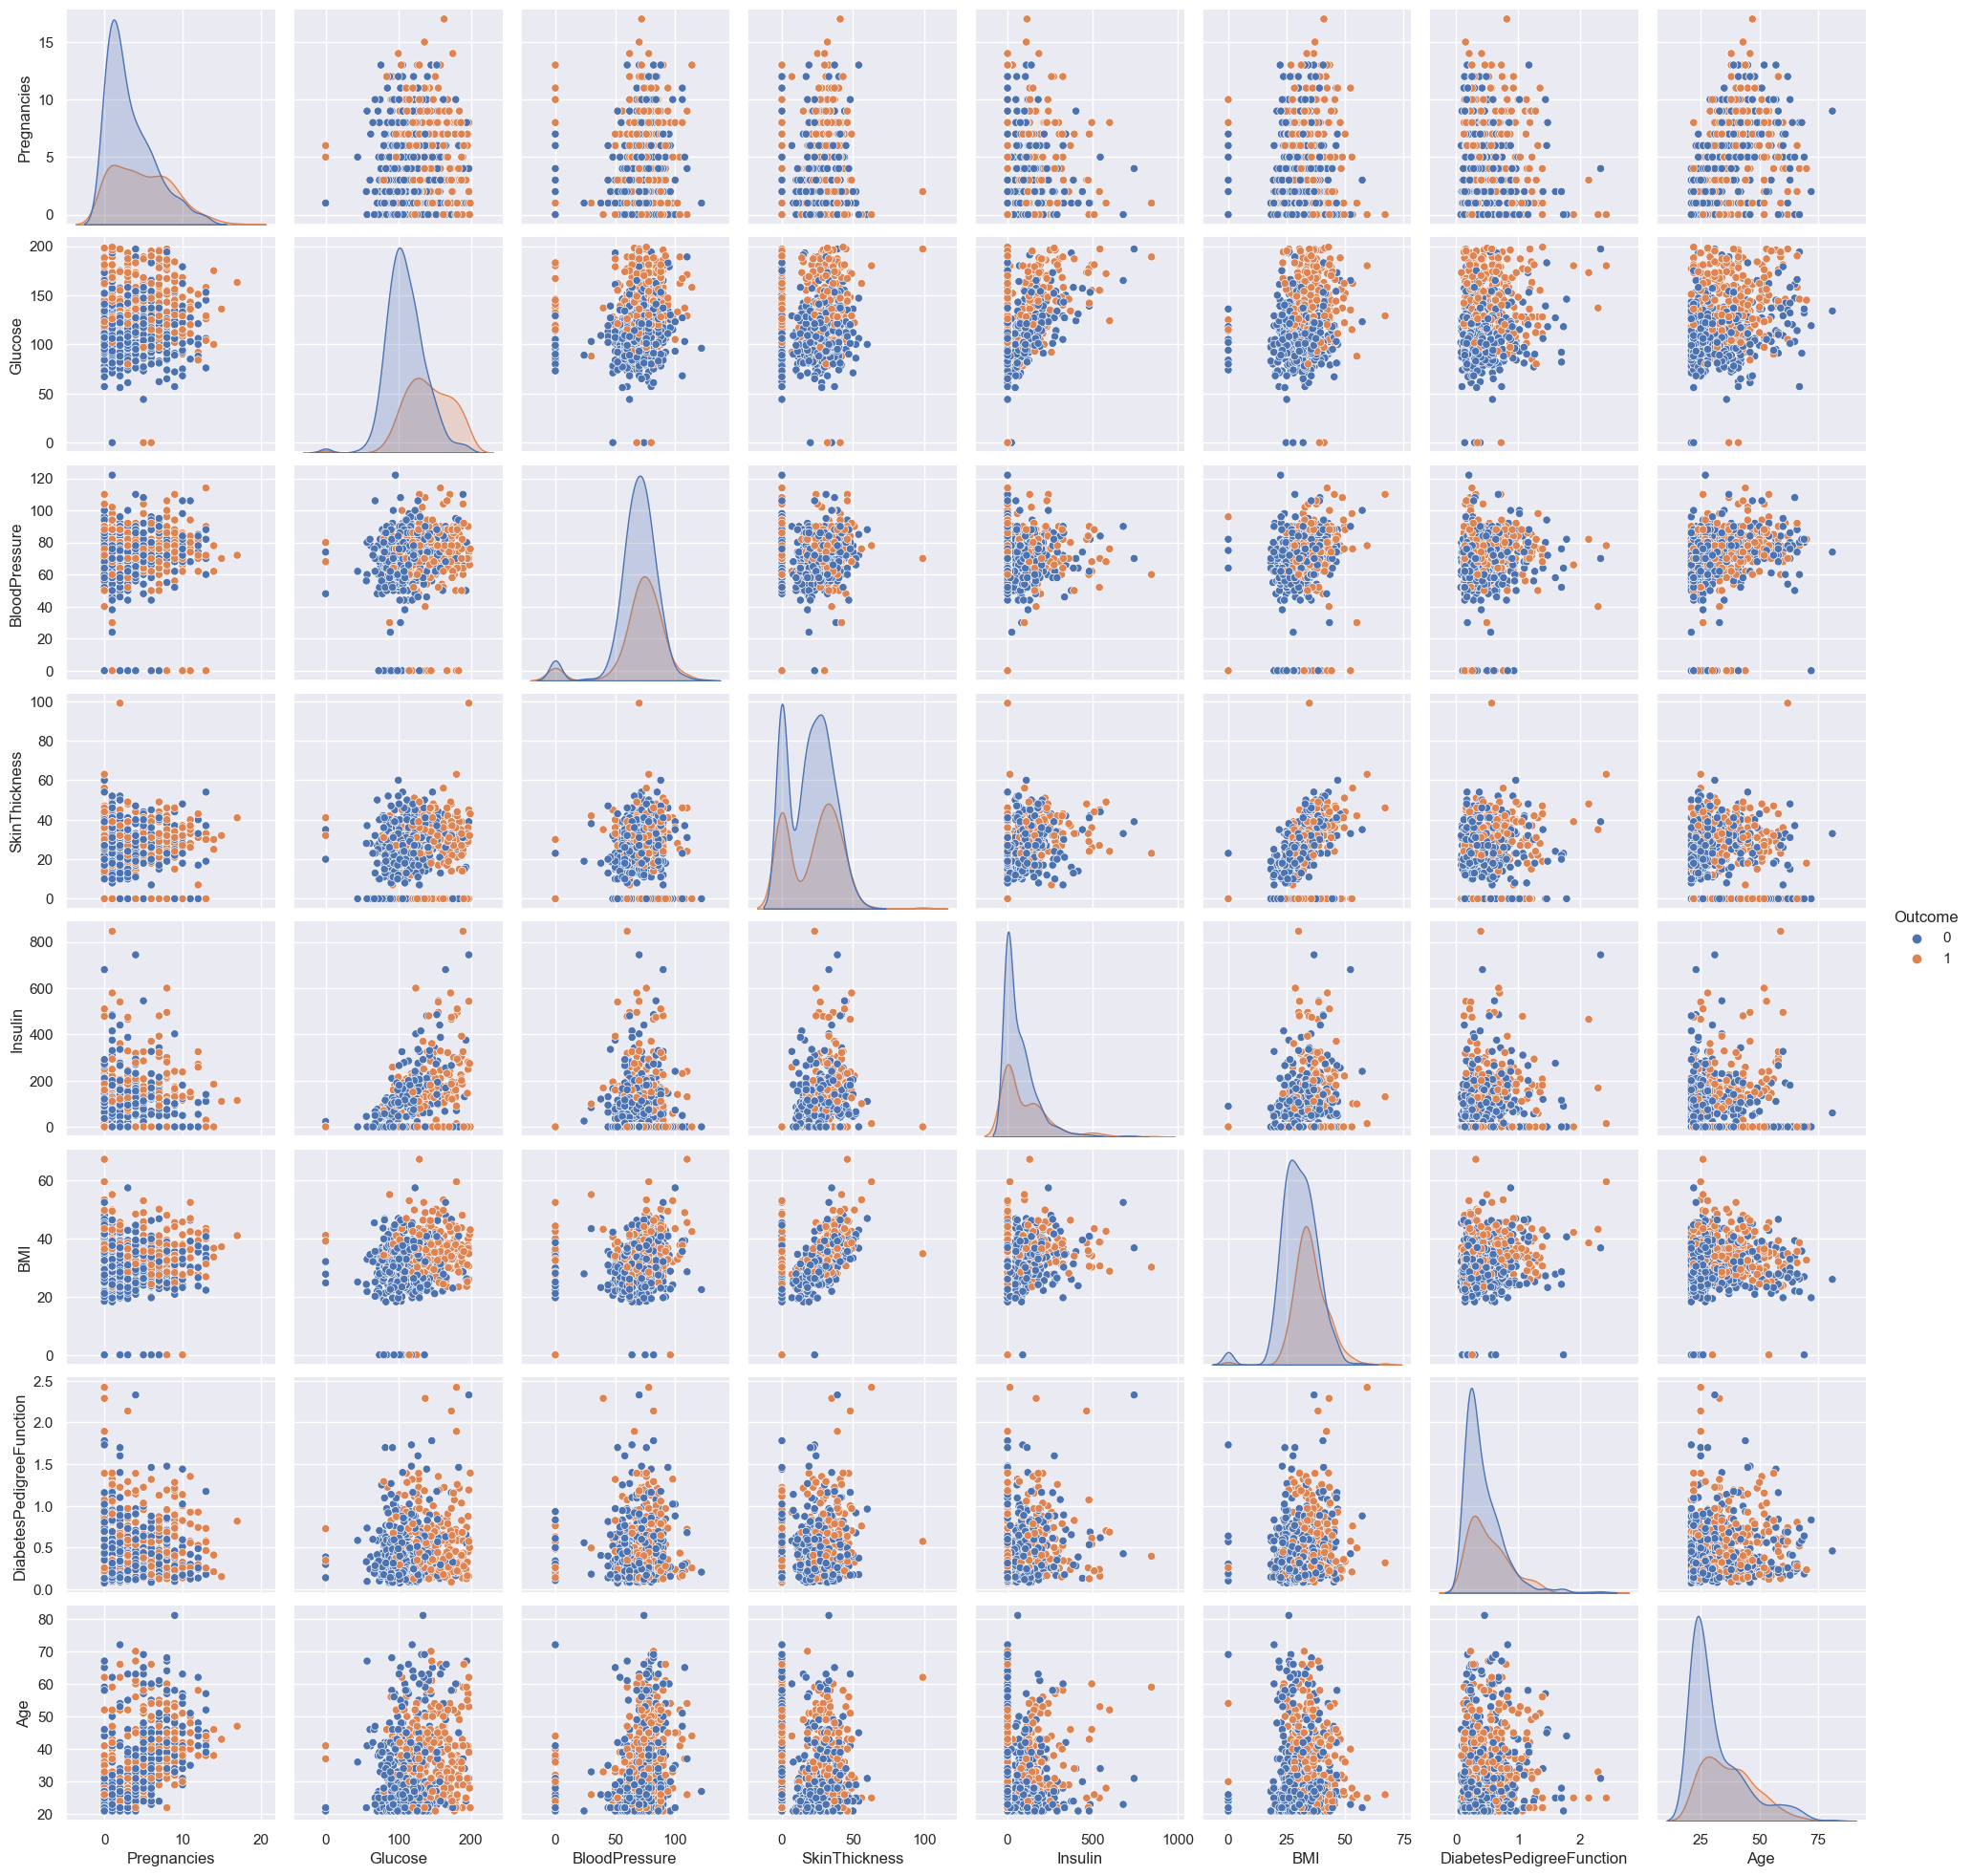

In [46]:
# pairwise scatter plot
sns.pairplot(diabetes, hue='Outcome')
plt.show()

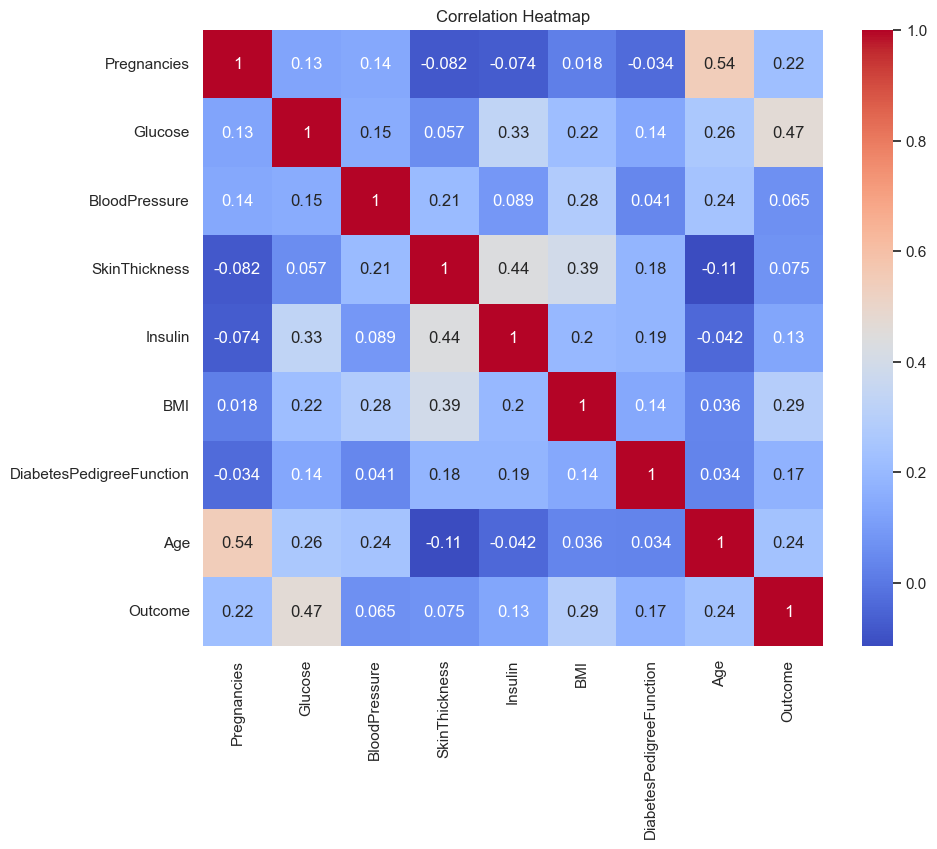

In [47]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

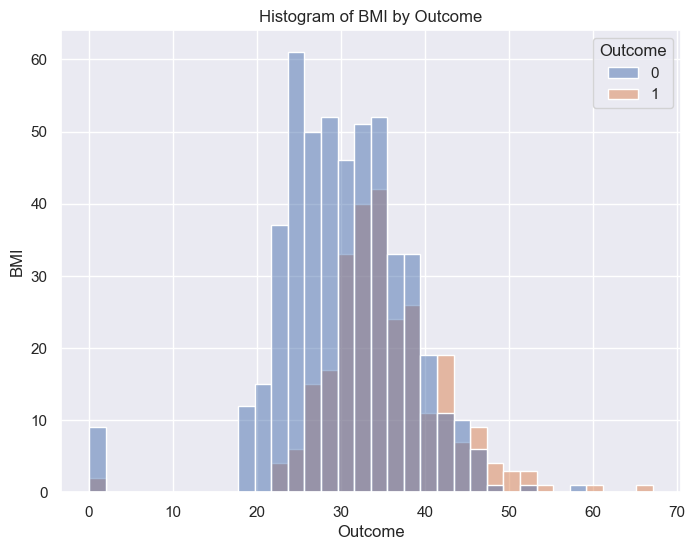

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes, x='BMI', hue='Outcome')
plt.title("Histogram of BMI by Outcome")
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

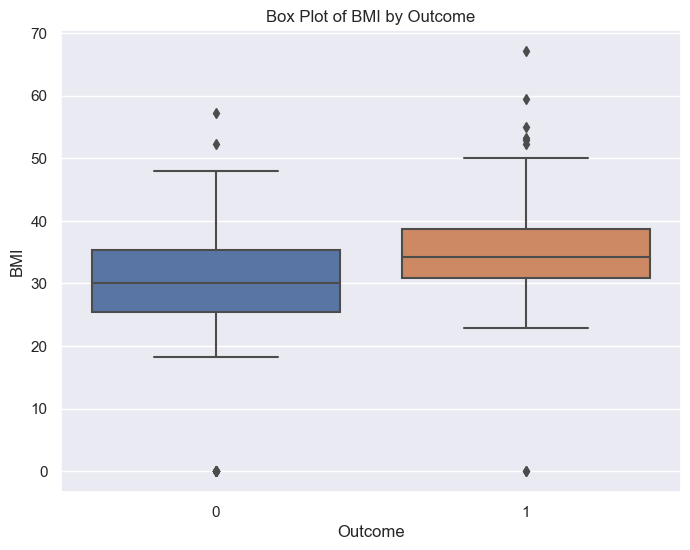

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=diabetes)
plt.title("Box Plot of BMI by Outcome")
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

<Figure size 1000x1000 with 0 Axes>

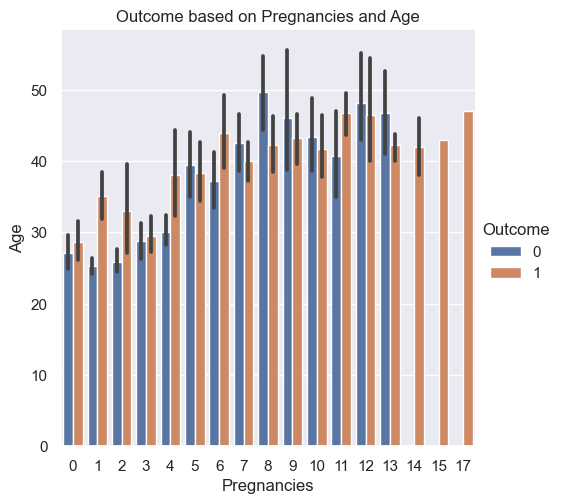

In [50]:
# visualize the survival rate based on passenger class and sex
plt.figure(figsize=(10, 10))
sns.catplot(x='Pregnancies', y='Age', hue='Outcome', data=diabetes, kind='bar')
plt.title('Outcome based on Pregnancies and Age')
plt.show()

In [51]:
# finding the average value based on the diabetic outcome
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Model Preparation

In [52]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [53]:
# separate features and target variable
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [54]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [92]:
# creating 2 datasets for different evaluation
diabetes_data = diabetes.copy()

#### Diabetes

###### Logistic Regression Diabetes

In [57]:
# Model 1

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 75.32467532467533
Confusion Matrix:
[[79 20]
 [18 37]]


In [58]:
# Model 2

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 78.57142857142857
Confusion Matrix:
[[86 13]
 [20 35]]


In [68]:
# Model 3

# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'C': 1}
Accuracy: 75.32467532467533
Confusion Matrix:
[[79 20]
 [18 37]]


In [69]:
# Model 4

# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'C': 10}
Accuracy: 77.92207792207793
Confusion Matrix:
[[85 14]
 [20 35]]


###### Decision Trees

In [61]:
# Model 1

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 74.67532467532467
Confusion Matrix:
[[75 24]
 [15 40]]


In [62]:
# Model 2

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 72.72727272727273
Confusion Matrix:
[[74 25]
 [17 38]]


In [63]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 75.97402597402598
Confusion Matrix:
[[83 16]
 [21 34]]


In [64]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 75.32467532467533
Confusion Matrix:
[[82 17]
 [21 34]]


###### Random Forest

In [65]:
# Model 1

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 72.07792207792207
Confusion Matrix:
[[77 22]
 [21 34]]


In [66]:
# Model 2

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 75.97402597402598
Confusion Matrix:
[[84 15]
 [22 33]]


In [88]:
# Model 3

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

KeyboardInterrupt: 

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Support Vector Machines

In [70]:
# Model 1

# Create an SVM classifier
model = SVC(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 76.62337662337663
Confusion Matrix:
[[87 12]
 [24 31]]


In [71]:
# Model 2

# Create an SVM classifier
model = SVC(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 74.02597402597402
Confusion Matrix:
[[84 15]
 [25 30]]


In [72]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.5, 1.0]}

# Create an SVM classifier
model = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

KeyboardInterrupt: 

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.5, 1.0]}

# Create an SVM classifier
model = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Naive Bayes

In [73]:
# Model 1

# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 76.62337662337663
Confusion Matrix:
[[79 20]
 [16 39]]


In [74]:
# Model 2

# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 79.22077922077922
Confusion Matrix:
[[84 15]
 [17 38]]


In [75]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'var_smoothing': 4.3287612810830526e-07}
Accuracy: 76.62337662337663
Confusion Matrix:
[[79 20]
 [16 39]]


In [76]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'var_smoothing': 0.0657933224657568}
Accuracy: 77.92207792207793
Confusion Matrix:
[[84 15]
 [19 36]]


###### K-Nearest Neighbors

In [77]:
# Model 1

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 66.23376623376623
Confusion Matrix:
[[70 29]
 [23 32]]


In [78]:
# Model 2

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 69.48051948051948
Confusion Matrix:
[[83 16]
 [31 24]]


In [79]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'n_neighbors': 9}
Accuracy: 72.07792207792207
Confusion Matrix:
[[74 25]
 [18 37]]


In [80]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: 
{'n_neighbors': 5}
Accuracy: 69.48051948051948
Confusion Matrix:
[[83 16]
 [31 24]]


In [ ]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({0:'M', 1:'B'})

#### Diabetes Data

In [93]:
# create new features
diabetes_data['PregnancyGroup'] = pd.cut(diabetes_data['Pregnancies'], bins=[0, 4, 8, 100], labels=['Low', 'Medium', 'High'])
diabetes_data['AgeGroup'] = pd.cut(diabetes_data['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
diabetes_data['BMI_Category'] = pd.cut(diabetes_data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# drop original columns
diabetes_data.drop(['Pregnancies', 'Age', 'BMI'], axis=1, inplace=True)

diabetes_data['PregnancyGroup'] = diabetes_data['PregnancyGroup'].replace({'Low': 0, 'Medium': 1, 'High': 3})
diabetes_data['AgeGroup'] = diabetes_data['AgeGroup'].replace({'Young': 0, 'Adult': 1, 'Middle-Aged': 2, 'Senior': 3})
diabetes_data['BMI_Category'] = diabetes_data['BMI_Category'].replace({'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3})

In [99]:
diabetes_data.isnull().sum()

Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
DiabetesPedigreeFunction      0
Outcome                       0
PregnancyGroup              111
AgeGroup                      0
BMI_Category                 11
dtype: int64

In [105]:
# fill missing age values with the median value
#diabetes_data['PregnancyGroup'] = diabetes_data['PregnancyGroup'].fillna(diabetes_data['PregnancyGroup'].median())
diabetes_data['PregnancyGroup'].value_counts()

0    381
1    190
3     86
Name: PregnancyGroup, dtype: int64

In [94]:
# separate features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [95]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###### Logistic Regression Diabetes_data

In [97]:
# Model 1

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Model 2

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 4

# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Decision Trees

In [ ]:
# Model 1

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 2

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Random Forest

In [ ]:
# Model 1

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 2

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Support Vector Machines

In [ ]:
# Model 1

# Create an SVM classifier
model = SVC(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 2

# Create an SVM classifier
model = SVC(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.5, 1.0]}

# Create an SVM classifier
model = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.5, 1.0]}

# Create an SVM classifier
model = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### Naive Bayes

In [ ]:
# Model 1

# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 2

# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 4

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

###### K-Nearest Neighbors

In [ ]:
# Model 1

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 2

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Model 3

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)